In [1]:
# import Libararies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py

In [14]:
# import data
df = pd.read_excel("./photosynthesis_dataset_mean.xlsx", sheet_name = "%change")

In [15]:
df

,Cultivar,Day,%change CHLM,%change FLVM,%change ANTHM,%change Nfi,%change DM,%change LM,%change SM
0,Alisa Criag,0,95.324675,103.448276,39.130435,88.321168,99.872465,91.463703,121.391485
1,Alisa Criag,11,73.911986,94.289509,422.222222,76.591154,93.465573,54.349718,16.139879
2,Alisa Criag,2,108.541667,93.388430,83.870968,120.918367,97.648013,95.966466,210.864486
3,Alisa Criag,4,45.925644,112.727695,86.153846,39.616198,98.414290,95.634864,71.961578
4,Alisa Criag,7,98.808861,108.449371,114.027149,68.402756,98.185730,81.594765,53.623780
5,Money Maker,0,91.077982,80.384615,47.666667,84.610149,98.117554,99.753144,125.327869
6,Money Maker,11,88.963211,85.461847,115.294118,119.488372,94.909091,75.034065,16.310680
7,Money Maker,2,62.192308,64.439359,89.375000,190.493692,103.477585,99.839491,113.324573
8,Money Maker,4,60.781967,197.086878,66.666667,57.143848,99.348155,116.152809,85.791506
9,Money Maker,7,137.269018,73.264862,1052.607710,162.913729,97.998121,97.683600,42.675585


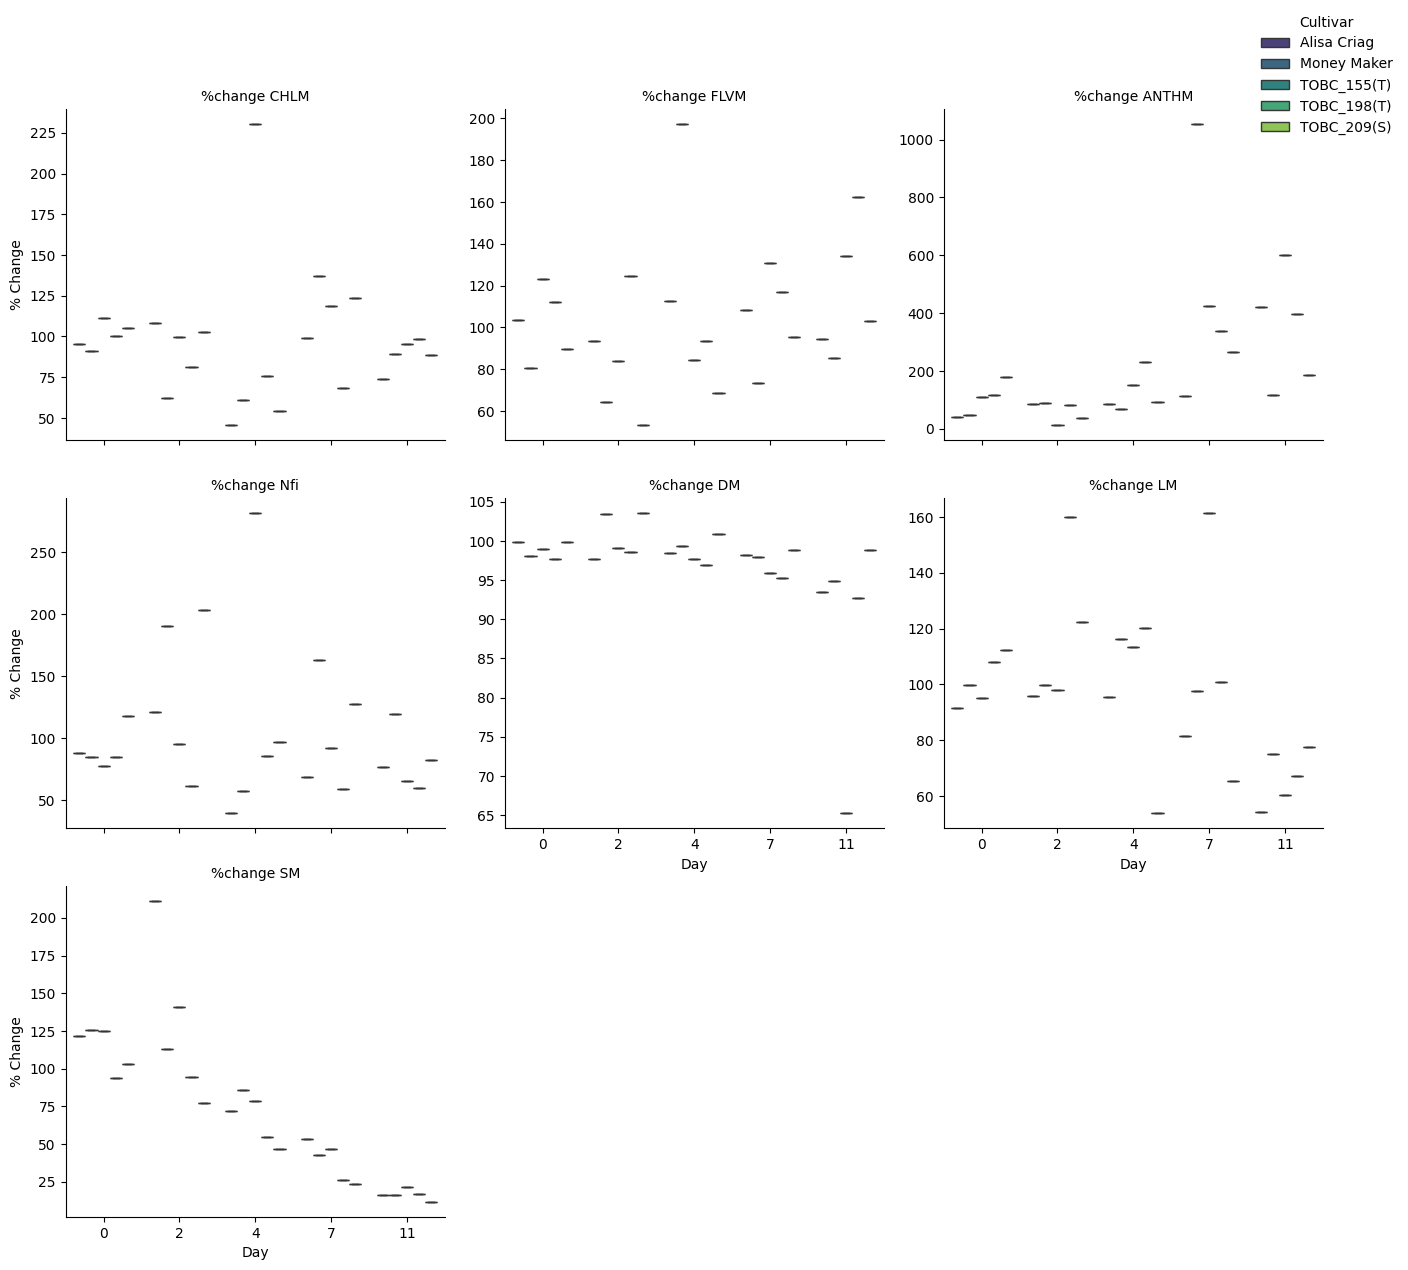

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Melt to long format for faceting
df_long = df.melt(
    id_vars=["Cultivar", "Day"], 
    value_vars=[col for col in df.columns if "%change" in col],
    var_name="Variable", 
    value_name="% Change"
)

# Plot all variables in a grid
g = sns.FacetGrid(
    df_long, 
    col="Variable", 
    col_wrap=3,  # 3 plots per row
    height=4, 
    sharey=False  # Each variable scales independently
)
g.map_dataframe(
    sns.boxplot, 
    x="Day", 
    y="% Change", 
    hue="Cultivar",
    palette="viridis",  # Use a colorblind-friendly palette
    dodge=True  # Separate boxes for each cultivar
)
g.set_titles("{col_name}")  # Use variable names as titles
g.add_legend(title="Cultivar", bbox_to_anchor=(1.05, 1))
g.set_axis_labels("Day", "% Change")
plt.tight_layout()
plt.show()

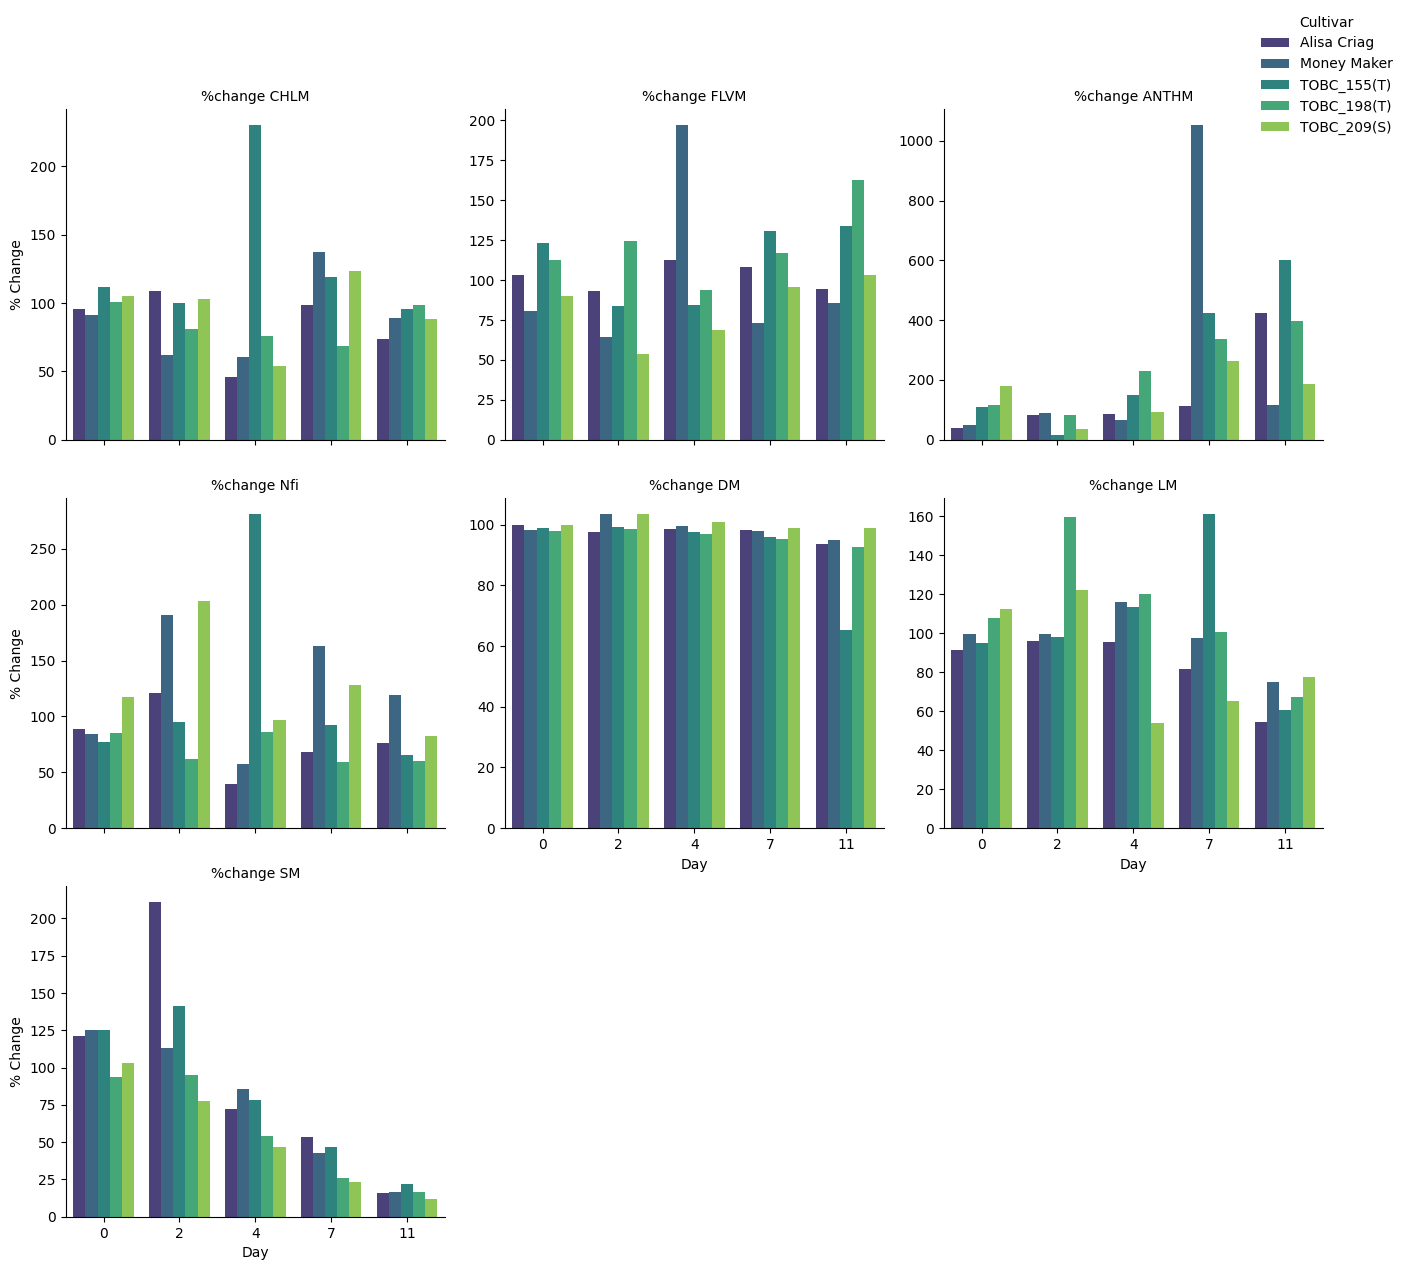

<Figure size 640x480 with 0 Axes>

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Melt to long format
df_long = df.melt(
    id_vars=["Cultivar", "Day"], 
    value_vars=[col for col in df.columns if "%change" in col],
    var_name="Variable", 
    value_name="% Change"
)

# Plot grouped bars in a grid
g = sns.FacetGrid(
    df_long, 
    col="Variable", 
    col_wrap=3, 
    height=4, 
    sharey=False
)
g.map_dataframe(
    sns.barplot, 
    x="Day", 
    y="% Change", 
    hue="Cultivar",
    palette="viridis",
    errorbar=None,  # Remove error bars (use ci=95 if needed)
    dodge=True     # Group bars side-by-side
)
g.set_titles("{col_name}")
g.add_legend(title="Cultivar", bbox_to_anchor=(1.05, 1))
g.set_axis_labels("Day", "% Change")
plt.tight_layout()
plt.show()
# After creating your FacetGrid plot, add this line before plt.show()
plt.savefig("grouped_bar_plots.png", dpi=300, bbox_inches="tight")
plt.show()  # Display the plot (optional)